<a href="https://colab.research.google.com/github/mukulre/Projects/blob/main/Tesla_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install fbprophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 51.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 74.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 4.9 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
  Running set

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

data = pd.read_csv("TSLA.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


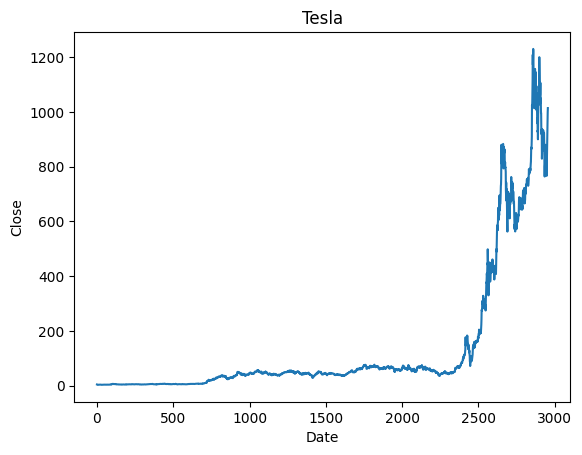

In [10]:
close = data['Close']
ax = close.plot(title='Tesla')
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.show()

In [11]:
data["Date"] = pd.to_datetime(data["Date"], infer_datetime_format=True)
data = data[["Date", "Close"]]

<ipython-input-11-c75fab8c7f56>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data["Date"] = pd.to_datetime(data["Date"], infer_datetime_format=True)


In [12]:
data = data.rename(columns={"Date" : "ds", "Close" : "y" })

In [13]:
model = Prophet()
model.fit(data)
predict = model.make_future_dataframe(periods=365)
forcast = model.predict(predict)
forcast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2ohyxi2b/njvza2yg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2ohyxi2b/cr_hfe8c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61231', 'data', 'file=/tmp/tmp2ohyxi2b/njvza2yg.json', 'init=/tmp/tmp2ohyxi2b/cr_hfe8c.json', 'output', 'file=/tmp/tmp2ohyxi2b/prophet_modelsusn3soa/prophet_model-20250127022736.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:27:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:27:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
3316,2023-03-20,1457.330133,1386.996180,1524.346788
3317,2023-03-21,1459.044084,1387.689564,1529.918116
3318,2023-03-22,1461.167517,1399.817722,1530.926260
3319,2023-03-23,1462.366839,1393.215542,1530.368140
3320,2023-03-24,1463.533078,1397.696941,1535.465634


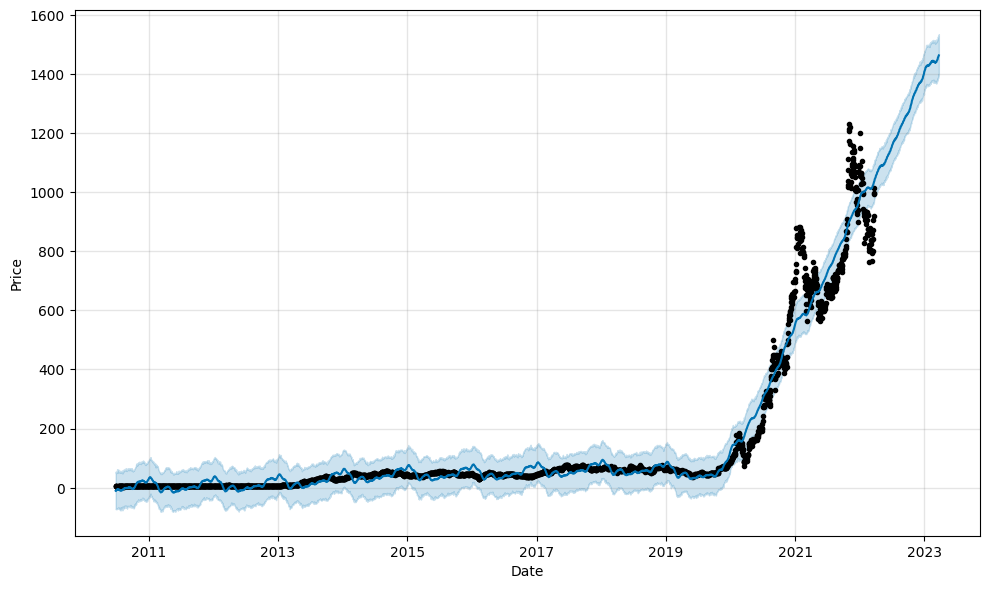

In [14]:
graph = model.plot(forcast, xlabel="Date", ylabel="Price")